Coffee First Pass

In [1]:
from modsim import *
init = State(T=70) #all temps in in C
coffee = System(init=init,
                volume=200, #ml
                k=0.033,
                T_dh= 24,
                T_out= 4.5,
                T_nord= 21,
                T_ac= 22,
                t_end=68,
                dt=1)

In [2]:
for t in range(1):
    T_env = 24
 
    
for t in range(1,2):
    T_env = 4.5
  
    
for t in range(2,62):
    T_env = 21
 
    
for t in range(62,63):
    T_env = 4.5
  
    
for t in range(63,68):
    T_env = 22
  

In [3]:
def update_func(state, t, system):

    unpack(system)
    
    T = state.T
    T += -k * (T - T_env) * dt
    
    return State(T=T)

In [4]:
update_func(init, 0, coffee)

,values
T,68.416


In [5]:
def run_simulation(system, update_func):

    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    ts = linrange(0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
        
    # store the final temperature in T_final
    system.T_final = get_last_value(frame.T)
    
    return frame

In [6]:
results = run_simulation(coffee, update_func)

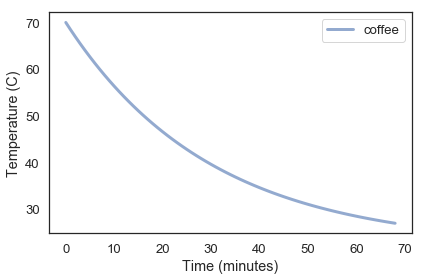

In [7]:
plot(results.T, label='coffee')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')

In [8]:
coffee.T_final

26.900512203335797

In [9]:
def make_system(T_init, k, volume, t_end):

    init = State(T=T_init)
    
    # T_final is used to store the final temperature.
    # Before the simulation runs, T_final = T_init
    T_final = T_init

    for t in range(1):
        T_env = 24
 
    
    for t in range(1,2):
        T_env = 4.5
  
    
    for t in range(2,62):
        T_env = 21
 
    
    for t in range(62,63):
        T_env = 4.5
  
    
    for t in range(63,68):
        T_env = 22
    dt = 1
                
    return System(locals())

In [10]:
coffee = make_system(T_init=70, k=0.033, volume=200, t_end=68)
results = run_simulation(coffee, update_func)
coffee.T_final

26.900512203335797

In [17]:
def sweep_T(T_array, k):
  
    sweep = SweepSeries()
    for T in T_array:
        system = make_system(T, k)
        results = run_simulation(system, update_func)
        sweep[system.T] = (results)
    return sweep

In [18]:
def sweep_parameters(T_array, k_array):
    """Sweep a range of values for beta and gamma.
    
    beta_array: array of infection rates
    gamma_array: array of recovery rates
    
    returns: SweepFrame with one row for each beta
             and one column for each gamma
    """
    frame = SweepFrame(columns=k_array)
    for k in k_array:
        frame[k] = sweep_T(T_array, k)
    return frame









In [19]:
for k in k_array:
    label = k = + str(k)
    plot(frame[k], label=label)
    
decorate(xlabel='Temperature (F)',
         ylabel='k',
         loc='upper left')

NameError: name 'k_array' is not defined